In [2]:
import iris
import iris.plot as iplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import warnings
from eofs.iris import Eof
from eofs.examples import example_data_path
import iris.coord_categorisation
import datetime as dt
import iris.quickplot as qplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [3]:
class slp:
    
    def __init__(self, year, pressure_list):
        self.pressure_list = pressure_list
        self.year = year
    
class slp_seasonal_mean:
    
    def __init__(self, year, mean):
        self.year = year
        self.mean = mean

In [4]:
#now calculating DJF means
def list_of_seasonal_means(slp_list):
    
    seasonal_mean_list = list()
    invalid_year_list = list()
    days_in_month = np.array([31,31,28])

    for item in slp_list:
        cur_year = item.year
        dec_slp = item.pressure_list[11]
        for thing in slp_list:
            if thing.year == cur_year + 1:
                jan_slp = thing.pressure_list[0]
                feb_slp = thing.pressure_list[1]
        running_total=0
        count=0
        djf_slp_list = np.array([dec_slp,jan_slp,feb_slp])
        valid = True
        for i in range(3):
            if djf_slp_list[i] == float(-10):
                valid = False
                pass
            else:
                running_total += days_in_month[i]*djf_slp_list[i]
                count += days_in_month[i]
        if valid == False:
            invalid_year_list.append(cur_year)
        if count == 0:
            pass
        else:
            mean = running_total/count 
            seasonal_mean_list.append(slp_seasonal_mean(cur_year,mean))
    return seasonal_mean_list, invalid_year_list
            

In [5]:
#ICELAND data
f = open("ICE_DATA.txt")
lines = f.readlines()
slp_list = list()
for line in lines:
    pressure_list = np.zeros(12)
    x=line.split()
    for i in range(12):
        pressure_list[i] = float(x[i+1])
    slp_list.append(slp(int(x[0]),pressure_list))



In [6]:
iceland_means, iceland_invalid = list_of_seasonal_means(slp_list)

In [7]:
for item in iceland_means:
    print(item.mean)
print(iceland_invalid)

10040.677777777777
9972.955555555556
9984.377777777778
9955.8
10082.422222222222
9931.611111111111
9987.255555555555
10036.644444444444
10088.422222222222
9923.18888888889
9961.611111111111
9903.111111111111
10011.544444444444
10007.533333333333
10032.155555555555
10040.833333333334
9931.1
10035.788888888888
10097.666666666666
9925.011111111111
9973.555555555555
10014.666666666666
9999.2
9977.455555555556
10056.31111111111
9940.988888888889
9933.511111111111
10036.877777777778
9893.455555555556
9969.011111111111
10016.1
10014.155555555555
10105.222222222223
10054.166666666666
9980.055555555555
9948.077777777778
9911.477777777778
10005.677777777777
10037.177777777777
10015.488888888889
9913.433333333332
9951.422222222222
10014.777777777777
9949.233333333334
10017.788888888888
9950.233333333334
9886.988888888889
10034.011111111111
10039.922222222222
9969.255555555555
10000.4
9934.1
10068.044444444444
9976.7
9963.622222222222
9993.344444444445
10087.344444444445
9970.544444444444
10149.96

In [8]:
#reads file and gives us a list full of slp
f = open("GIB_DATA.txt")
lines = f.readlines()
slp_azores_list = list()
for line in lines:
    pressure_list = np.zeros(12)
    x=line.split()
    for i in range(12):
        pressure_list[i] = float(x[i+1])
    slp_azores_list.append(slp(int(x[0]),pressure_list))
#creates a mean and spits it out
azores_means, azores_invalid = list_of_seasonal_means(slp_azores_list)

In [9]:
#sanity check
for item in azores_means:
    print(item.mean)
print(azores_invalid)

10253.066666666668
10166.0
10187.133333333333
10192.41111111111
10182.366666666667
10181.022222222222
10217.566666666668
10200.533333333333
10193.233333333334
10181.066666666668
10179.58888888889
10239.833333333334
10267.855555555556
10242.533333333333
10204.18888888889
10230.022222222222
10185.144444444444
10255.322222222223
10235.81111111111
10185.544444444444
10243.655555555555
10192.2
10240.133333333333
10193.477777777778
10232.433333333332
10196.044444444444
10204.655555555555
10257.944444444445
10240.144444444444
10232.166666666666
10228.288888888888
10190.577777777778
10193.944444444445
10202.166666666666
10187.333333333334
10199.322222222223
10235.611111111111
10251.944444444445
10208.988888888889
10191.866666666667
10190.611111111111
10241.31111111111
10223.877777777778
10195.077777777778
10237.1
10239.91111111111
10231.622222222222
10255.744444444445
10187.788888888888
10204.844444444445
10203.855555555556
10218.566666666668
10235.066666666668
10210.922222222222
10212.2888888

In [10]:
#creating a list of differences 
list_of_differences = list()
year1 = 1978
year2 = 2011
while year1 <= year2:
    for slp_a in azores_means:
        if slp_a.year == year1:
            az_slp = slp_a.mean
    for slp_i in iceland_means:
        if slp_i.year == year1:
            ic_slp = slp_i.mean
    list_of_differences.append(az_slp-ic_slp)
    year1 += 1
print(list_of_differences)
list_of_differences = np.array(list_of_differences)
np.savetxt('NAO_I_Jones_1978-2011.csv', list_of_differences, delimiter=',')

[88.12222222222226, 201.57777777777846, 235.4777777777781, 184.64444444444416, 289.35555555555584, 291.37777777777774, 147.322222222223, 121.21111111111168, 187.53333333333285, 187.22222222222263, 353.4111111111124, 347.39999999999964, 240.94444444444343, 260.4777777777781, 278.2888888888883, 256.0666666666675, 350.3444444444449, 84.86666666666679, 169.12222222222226, 227.3444444444449, 290.37777777777774, 297.0444444444438, 157.75555555555547, 226.4111111111124, 192.5222222222219, 152.83333333333394, 203.09999999999854, 161.60000000000036, 274.0222222222219, 284.9333333333325, 195.01111111111095, 23.755555555557294, 136.29999999999927, 292.96666666666715]


In [11]:
#analysis
stddv = np.std(list_of_differences)
mean_diff = np.mean(list_of_differences)
list_of_differences = (list_of_differences - mean_diff)/stddv
print(list_of_differences)
np.savetxt('NAO_I_Jones_1978-2011.csv', list_of_differences, delimiter=',')
print(mean_diff)

[-1.65600068 -0.2023939   0.23193715 -0.41934588  0.92222599  0.94813495
 -0.89752287 -1.23206169 -0.38233308 -0.38631907  1.74291379  1.66589868
  0.30197677  0.55224028  0.78043847  0.49572457  1.70362327 -1.69771127
 -0.61821854  0.12773186  0.93532283  1.02073699 -0.7638497   0.11577388
 -0.31841481 -0.82691382 -0.18289099 -0.71459419  0.7257734   0.86556792
 -0.28652685 -2.48067448 -1.03874096  0.96849199]
217.3748366013073


<Figure size 432x288 with 0 Axes>

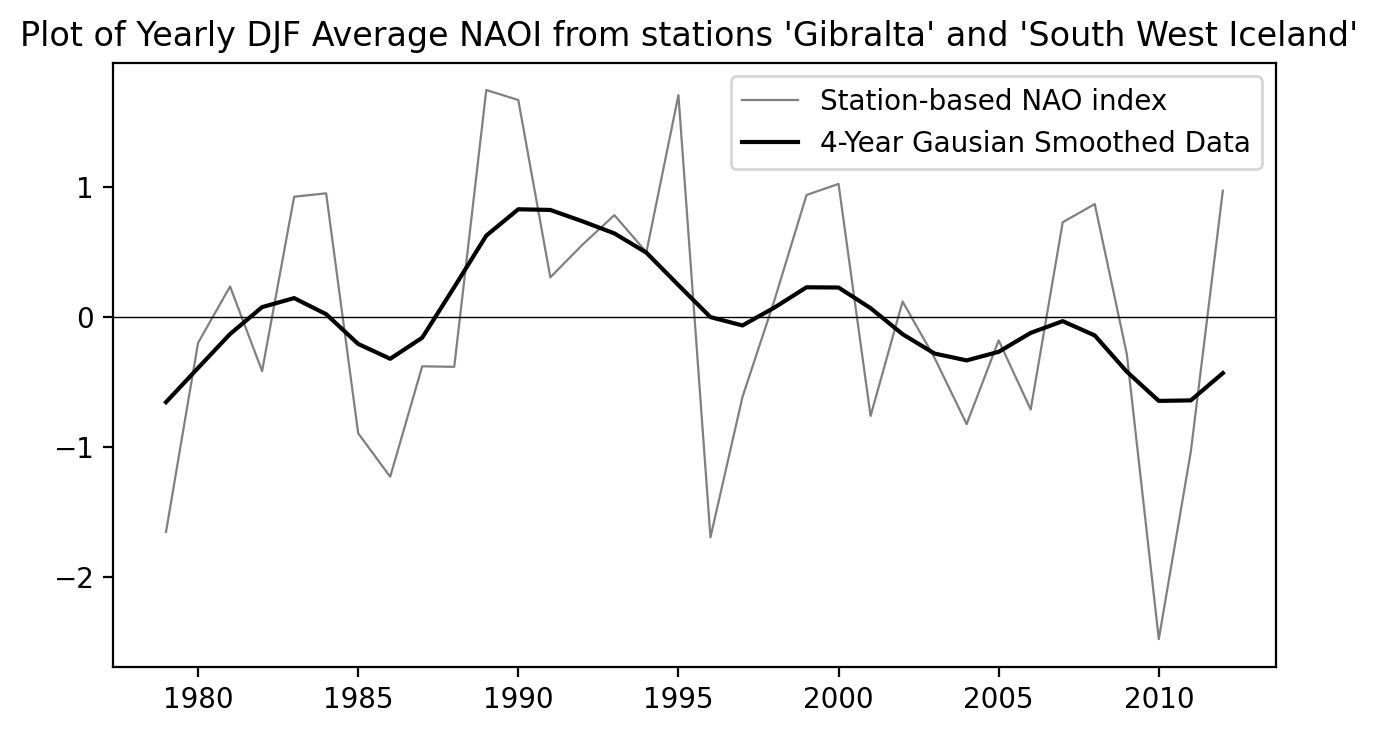

In [12]:
#function for gausian smoothing 
def fwhm_to_sigma(fwhm):
    return fwhm / np.sqrt(8 * np.log(2))
#this is to give the list of a kernal for a certain point


def gaussian_smoother(fwhm,data):
    sigma = fwhm_to_sigma(fwhm)
    output = np.zeros(len(data))
    for index in range(len(data)):
        kernal_list = np.zeros(len(data))
        #creating kernal list
        for kernal_index in range(len(data)):
            kernal_list[kernal_index] = np.exp(-(kernal_index - index) ** 2 / (2 * sigma ** 2))
        #normalisation
        normalisation_constant = 0
        for kernal_index in range(len(data)):
            normalisation_constant += kernal_list[kernal_index]
        kernal_list = kernal_list / normalisation_constant
        for kernal_index in range(len(data)):
            output[index] += kernal_list[kernal_index]*data[kernal_index]
    return output

#plotting
plt.clf()
plt.figure(figsize=(7.5,4), dpi=200)

#plt.suptitle('SLP: DJF: '+str(year1) +' - ' + str(year2))

plt.plot(np.arange(1979,2013),list_of_differences ,color='grey',label = 'Station-based NAO index',linewidth=0.8)
plt.title('''Plot of Yearly DJF Average NAOI from stations 'Gibralta' and 'South West Iceland' ''')
#smoothing the data
smoothed_data = gaussian_smoother(4,list_of_differences)

plt.plot(np.arange(1979,2013),smoothed_data, color = 'black',label = '4-Year Gausian Smoothed Data')
plt.legend()
plt.axhline(color='black', linewidth = 0.5)
plt.savefig(str(year1)+'_'+str(year2)+ '_'+'station_based_GIBRALTA_SW_Iceland.png')
plt.show()


